# Data splitting, model creation and evaluation

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [78]:
# Retrieve the processed data set
df = pd.read_csv('processed_project_data.csv', header=[0]);
df
# Define target classes (for future use)
target_classes = ['Fail', 'Pass', 'N/A']

## Data spliting

In [79]:
# Split data into train and test sets
X, y = df.iloc[:,:-1], df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Experiment 1

### Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35       620
           1       0.85      0.83      0.84     10147
           2       0.19      0.21      0.20      1607

    accuracy                           0.73     12374
   macro avg       0.46      0.47      0.46     12374
weighted avg       0.74      0.73      0.73     12374



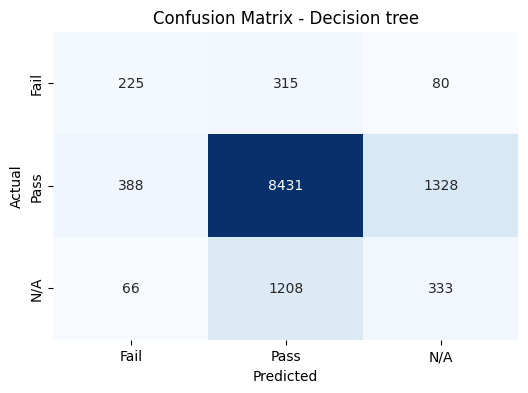


Accuracy: 72.64%


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Initialize a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the decision tree model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

classification_report_output = classification_report(y_test, y_pred)

# Display the results
print('Classification Report:')
print(classification_report_output)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=target_classes, yticklabels=target_classes)
plt.title("Confusion Matrix - Decision tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

### RandomForest

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.05      0.09       620
           1       0.82      0.99      0.90     10147
           2       0.05      0.00      0.00      1607

    accuracy                           0.81     12374
   macro avg       0.42      0.35      0.33     12374
weighted avg       0.70      0.81      0.74     12374



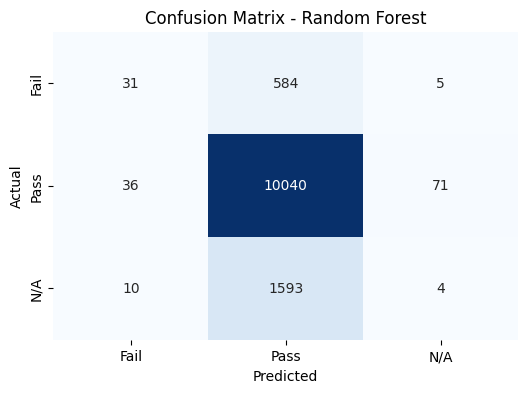


Accuracy: 81.42%


In [81]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

classification_report_output = classification_report(y_test, y_pred)

# Display the results
print('Classification Report:')
print(classification_report_output)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=target_classes, yticklabels=target_classes)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

### Neural network

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Create network
neural_model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes, so use softmax activation
])

# Compile the model
neural_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
neural_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               262656    
                                                                 
 dense_25 (Dense)            (None, 64)                16448     
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dense_27 (Dense)            (None, 3)                 51        
                                                                 
Total params: 280195 (1.07 MB)
Trainable params: 280195 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
neural_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1547/1547 [==============================] - 2s 1ms/step - loss: 0.5875 - accuracy: 0.8181 - val_loss: 0.5773 - val_accuracy: 0.8200
Epoch 2/10
1547/1547 [==============================] - 1s 941us/step - loss: 0.5804 - accuracy: 0.8184 - val_loss: 0.5743 - val_accuracy: 0.8200
Epoch 3/10
1547/1547 [==============================] - 1s 937us/step - loss: 0.5610 - accuracy: 0.8185 - val_loss: 0.5376 - val_accuracy: 0.8169
Epoch 4/10
1547/1547 [==============================] - 2s 1ms/step - loss: 0.5380 - accuracy: 0.8190 - val_loss: 0.5432 - val_accuracy: 0.8200
Epoch 5/10
1547/1547 [==============================] - 2s 1ms/step - loss: 0.5325 - accuracy: 0.8190 - val_loss: 0.5610 - val_accuracy: 0.8085
Epoch 6/10
1547/1547 [==============================] - 2s 1ms/step - loss: 0.5346 - accuracy: 0.8190 - val_loss: 0.5364 - val_accuracy: 0.8174
Epoch 7/10
1547/1547 [==============================] - 1s 940us/step - loss: 0.5324 - accuracy: 0.8187 - val_loss: 0.5413 - val_acc

387/387 [==============================] - 0s 407us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       620
           1       0.82      1.00      0.90     10147
           2       0.00      0.00      0.00      1607

    accuracy                           0.82     12374
   macro avg       0.27      0.33      0.30     12374
weighted avg       0.67      0.82      0.74     12374



/Users/OmarGutierrez/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/OmarGutierrez/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/OmarGutierrez/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

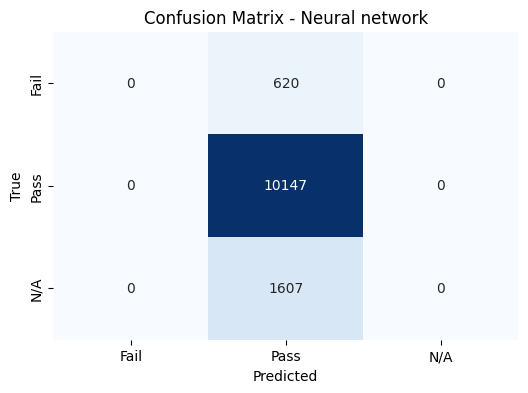


Accuracy: 82.00%


In [84]:
# Predict probabilities for each class
y_pred_prob = neural_model.predict(X_test)

# Extract the class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Neural network')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

## Experiment 2

### Deal with class imbalance

inspection_result
1    50653
2     8047
0     3169
Name: count, dtype: int64


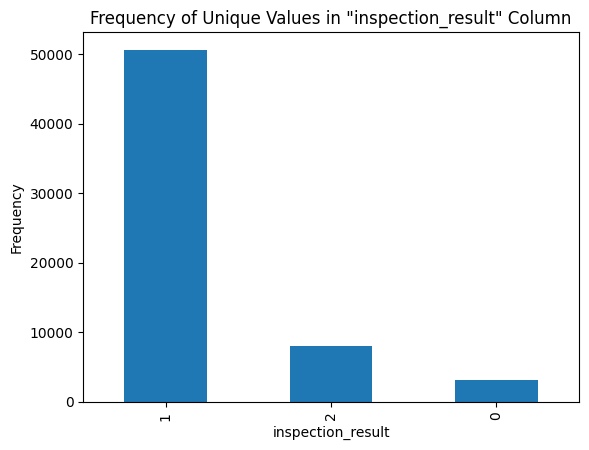

In [85]:
# Get value counts of the 'Category' column
value_counts = df['inspection_result'].value_counts()
print(value_counts)
# Plot the bar chart
value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('inspection_result')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values in "inspection_result" Column')

# Display the plot
plt.show()

In [114]:
from sklearn.utils import resample

# Define the classes
pass_class = 1
fail_class = 0
na_class   = 2

# Separate the majority and minority classes
pass_samples = df[df['inspection_result'] == pass_class]
fail_samples = df[df['inspection_result'] == fail_class]
na_samples   = df[df['inspection_result'] == na_class]

mayority = len(pass_samples)
minority = len(fail_samples) + len(na_samples)

# Number of balanced subsets you want to create
num_subsets = mayority//(minority)

# Create multiple balanced subsets
balanced_subsets = []
for _ in range(num_subsets):
    # Randomly sample the majority class for each minority class
    pass_samples_balanced1 = resample(pass_samples, replace=False, n_samples=len(fail_samples), random_state=_)
    pass_samples_balanced2 = resample(pass_samples, replace=False, n_samples=len(na_samples), random_state=_)

    # Combine minority class1, minority class2, and balanced majority class samples
    balanced_df = pd.concat([fail_samples, na_samples, pass_samples_balanced1, pass_samples_balanced2])
    balanced_subsets.append((balanced_df.drop('inspection_result', axis=1), balanced_df['inspection_result']))

# Now you have a list of balanced subsets in balanced_subsets
# Each subset contains X and y that can be used for training and validation

4


In [87]:
# Split the last balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_subsets[-1][0], balanced_subsets[-1][1], test_size=0.2, random_state=42)

### Decision tree

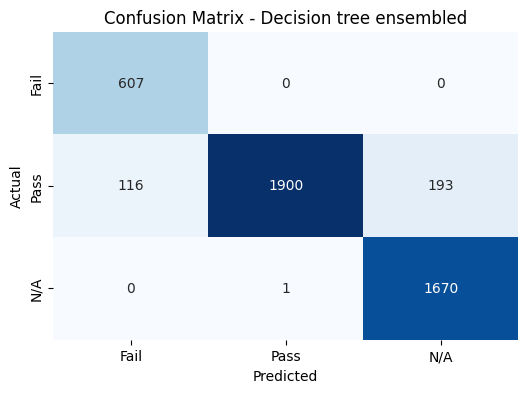

Ensemble Accuracy: 0.9309115221751727


In [88]:
# Initialize an empty list to store individual decision tree models
tree_models = []

# Train a decision tree on each balanced dataset
for X_balanced, y_balanced in balanced_subsets:
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_balanced, y_balanced)
    tree_models.append(tree_model)

# Make predictions on the test set using each decision tree
tree_predictions = [tree.predict(X_test) for tree in tree_models]

# Combine the predictions using majority voting
ensemble_predictions = pd.DataFrame(tree_predictions).mode(axis=0).iloc[0]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision tree ensembled')
plt.show()

# Evaluate the performance of the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {accuracy}')

### Neural network

In [89]:
from sklearn.utils import shuffle

# Concatenate all balanced subsets for training
X_train = pd.concat([X_balanced for X_balanced, _ in balanced_subsets], ignore_index=True)
y_train = pd.concat([y_balanced for _, y_balanced in balanced_subsets], ignore_index=True)

# Shuffle the concatenated data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [90]:
# Train the model
neural_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/10
1795/1795 - 2s - loss: 0.8742 - accuracy: 0.5528 - val_loss: 0.8674 - val_accuracy: 0.5572 - 2s/epoch - 900us/step
Epoch 2/10
1795/1795 - 1s - loss: 0.8705 - accuracy: 0.5542 - val_loss: 0.8567 - val_accuracy: 0.5630 - 1s/epoch - 830us/step
Epoch 3/10
1795/1795 - 1s - loss: 0.8683 - accuracy: 0.5543 - val_loss: 0.8579 - val_accuracy: 0.5643 - 1s/epoch - 826us/step
Epoch 4/10
1795/1795 - 1s - loss: 0.8676 - accuracy: 0.5545 - val_loss: 0.8622 - val_accuracy: 0.5599 - 1s/epoch - 833us/step
Epoch 5/10
1795/1795 - 2s - loss: 0.8670 - accuracy: 0.5551 - val_loss: 0.8610 - val_accuracy: 0.5596 - 2s/epoch - 852us/step
Epoch 6/10
1795/1795 - 2s - loss: 0.8675 - accuracy: 0.5556 - val_loss: 0.8584 - val_accuracy: 0.5630 - 2s/epoch - 845us/step
Epoch 7/10
1795/1795 - 2s - loss: 0.8675 - accuracy: 0.5554 - val_loss: 0.8729 - val_accuracy: 0.5621 - 2s/epoch - 848us/step
Epoch 8/10
1795/1795 - 2s - loss: 0.8686 - accuracy: 0.5548 - val_loss: 0.8548 - val_accuracy: 0.5648 - 2s/epoch - 839

561/561 [==============================] - 0s 356us/step
Confusion Matrix:
[[1611 1016    0]
 [ 471 8490    0]
 [ 252 6106    0]]


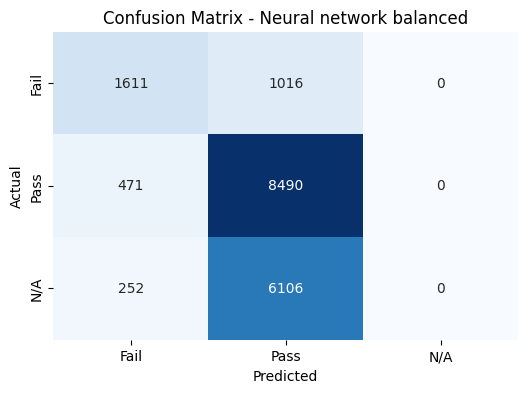

Model Accuracy: 0.5628552323637579


In [91]:
# Make predictions on the test set
y_pred_prob = neural_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural network balanced')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

## Experiment 3

### Reduce dataset (drop N/A class)

In [92]:
# Remove the N/A to get a binary dataset
reduced_df = copy.deepcopy(df)
reduced_df = reduced_df.replace(2, np.NaN)

print(reduced_df.isnull().sum())

encoded_1                       0
encoded_2                       0
encoded_3                       0
encoded_4                       0
encoded_5                       0
                             ... 
encoded_1022                    0
encoded_1023                    0
encoded_1024                    0
days_since_last_performed       0
inspection_result            8047
Length: 1026, dtype: int64


In [93]:
reduced_df = reduced_df.dropna(axis=0)
reduced_target_classes = ['Fail', 'Pass']

### Deal with class imbalance

In [112]:
# Define the classes
majority_class = 1 # Pass
minority_class = 0 # Fail

# Separate the majority and minority classes
majority_samples = reduced_df[reduced_df['inspection_result'] == majority_class]
minority_samples = reduced_df[reduced_df['inspection_result'] == minority_class]

mayority = len(majority_samples)
minority = len(minority_samples)

# Number of balanced subsets you want to create
num_subsets = mayority//minority

# Create multiple balanced subsets
balanced_subsets = []
for _ in range(num_subsets):
    # Randomly sample the majority class for each minority class
    majority_samples_balanced = resample(majority_samples, replace=False, n_samples=len(minority_samples), random_state=42)
    
    # Combine minority class1, minority class2, and balanced majority class samples
    balanced_df = pd.concat([minority_samples, majority_samples_balanced])
    balanced_subsets.append((balanced_df.drop('inspection_result', axis=1), balanced_df['inspection_result']))

# Now you have a list of balanced subsets in balanced_subsets
# Each subset contains X and y that can be used for training and validation

In [113]:
# Split the last balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_subsets[-1][0], balanced_subsets[-1][1], test_size=0.2, random_state=42)

### Decision tree

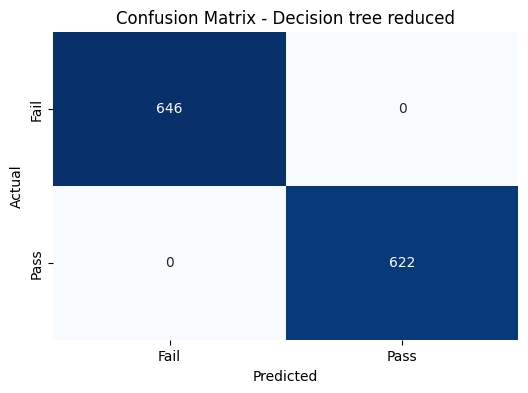

Ensemble Accuracy: 1.0


In [96]:
# Initialize an empty list to store individual decision tree models
tree_models = []

# Train a decision tree on each balanced dataset
for X_balanced, y_balanced in balanced_subsets:
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_balanced, y_balanced)
    tree_models.append(tree_model)

# Make predictions on the test set using each decision tree
tree_predictions = [tree.predict(X_test) for tree in tree_models]

# Combine the predictions using majority voting
ensemble_predictions = pd.DataFrame(tree_predictions).mode(axis=0).iloc[0]

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=reduced_target_classes, yticklabels=reduced_target_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision tree reduced')
plt.show()

# Evaluate the performance of the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {accuracy}')

### Logistic Regression

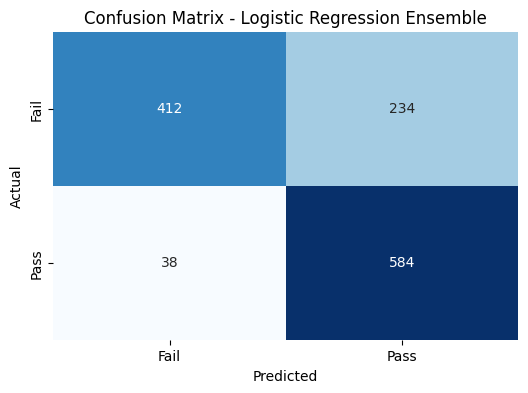

Ensemble Accuracy: 0.7854889589905363


In [97]:
from sklearn.linear_model import LogisticRegression

# Initialize an empty list to store individual logistic regression models
logistic_models = []

# Train a logistic regression model on each balanced dataset
for X_balanced, y_balanced in balanced_subsets:
    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_balanced, y_balanced)
    logistic_models.append(logistic_model)

# Make predictions on the test set using each logistic regression model
logistic_predictions = [logistic.predict(X_test) for logistic in logistic_models]

# Combine the predictions using majority voting
ensemble_predictions = pd.DataFrame(logistic_predictions).mode(axis=0).iloc[0]

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=reduced_target_classes, yticklabels=reduced_target_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Ensemble')
plt.show()

# Evaluate the performance of the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {accuracy}')

### Neural network

In [98]:
# Concatenate all balanced subsets for training
X_train = pd.concat([X_balanced for X_balanced, _ in balanced_subsets], ignore_index=True)
y_train = pd.concat([y_balanced for _, y_balanced in balanced_subsets], ignore_index=True)

# Shuffle the concatenated data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

reduced_neural_model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
reduced_neural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
reduced_neural_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               262656    
                                                                 
 dense_29 (Dense)            (None, 64)                16448     
                                                                 
 dense_30 (Dense)            (None, 16)                1040      
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 280161 (1.07 MB)
Trainable params: 280161 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
# Train the model
reduced_neural_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/10
1902/1902 - 2s - loss: 0.6033 - accuracy: 0.6561 - val_loss: 0.5255 - val_accuracy: 0.7449 - 2s/epoch - 940us/step
Epoch 2/10
1902/1902 - 2s - loss: 0.5077 - accuracy: 0.7661 - val_loss: 0.4854 - val_accuracy: 0.7860 - 2s/epoch - 843us/step
Epoch 3/10
1902/1902 - 2s - loss: 0.5119 - accuracy: 0.7604 - val_loss: 0.4760 - val_accuracy: 0.7898 - 2s/epoch - 866us/step
Epoch 4/10
1902/1902 - 2s - loss: 0.4965 - accuracy: 0.7759 - val_loss: 0.4873 - val_accuracy: 0.7861 - 2s/epoch - 863us/step
Epoch 5/10
1902/1902 - 2s - loss: 0.5007 - accuracy: 0.7714 - val_loss: 0.4835 - val_accuracy: 0.7877 - 2s/epoch - 841us/step
Epoch 6/10
1902/1902 - 2s - loss: 0.4959 - accuracy: 0.7756 - val_loss: 0.5250 - val_accuracy: 0.7480 - 2s/epoch - 836us/step
Epoch 7/10
1902/1902 - 2s - loss: 0.4929 - accuracy: 0.7785 - val_loss: 0.4954 - val_accuracy: 0.7804 - 2s/epoch - 847us/step
Epoch 8/10
1902/1902 - 2s - loss: 0.4972 - accuracy: 0.7745 - val_loss: 0.5311 - val_accuracy: 0.7445 - 2s/epoch - 853

595/595 [==============================] - 0s 369us/step


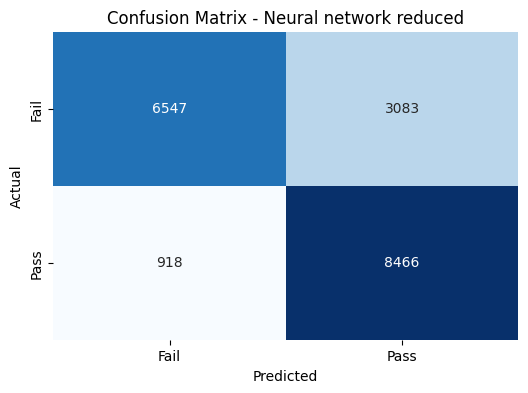

Accuracy on Test Set: 78.96%


In [100]:
# Predict the probabilities on the test set
y_pred_probs = reduced_neural_model.predict(X_test)

y_pred_classes = np.round(y_pred_probs).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=reduced_target_classes, yticklabels=reduced_target_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural network reduced')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy on Test Set: {accuracy*100:.2f}%")